##### Final Project Script: Wooing the Best Bank Deposit Customers

                                   Accuracy Precision Recall	Features
                                   
                    Random Forest	   0.35	0.13	0.83	Balanced target classes:  Numerical and Categorical
                    Logistic Regression 0.80	0.31	0.65	Balanced target classes:  Numerical and Categorical
                    SVC 	            0.84	0.37	0.60	Balanced target classes:  Numerical and Categorical
                    Naïve-Bayes         0.72	0.25	0.70	Numerical only, Independent variables
                    KNN                 0.89	0.54	0.28	Balanced target classes:  Numerical and Categorical
                    Simply NO	       0.89	0.89	0.00	Baseline model



In [1]:
'''
Try all the very nifty things in this article...also build functions for the the blocks of code that are repeated:
     Standardizing
     One Hot Encoding categoricals
     SMOTE-Tomek over sampling
     
Use PCA from Chapter 9 for Feature Reduction   Python Machine Learning Cookbook- use for better NB feature selection
Use the way she creates the unique dummy variables- very cool

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 

Try adding XG Boost

Be explicit about why I dropped 'duration' -   because you can't know duration of the conversation in advance.
This is how real life works and unfortunately decreases the accuracy and recall of the model.

PUT THIS ON MY GIT HUB PAGE

Also:

https://www.kaggle.com/mayurjain/ml-bank-marketing-solution 

'''

"\nTry all the very nifty things in this article...also build functions for the the blocks of code that are repeated:\n     Standardizing\n     One Hot Encoding categoricals\n     SMOTE-Tomek over sampling\n     \nUse PCA from Chapter 9 for Feature Reduction   Python Machine Learning Cookbook- use for better NB feature selection\nUse the way she creates the unique dummy variables- very cool\n\nhttps://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 \n\nTry adding XG Boost\n\nBe explicit about why I dropped 'duration' -   because you can't know duration of the conversation in advance.\nThis is how real life works and unfortunately decreases the accuracy and recall of the model.\n\nPUT THIS ON MY GIT HUB PAGE\n\nAlso:\n\nhttps://www.kaggle.com/mayurjain/ml-bank-marketing-solution \n\n"

In [2]:
pwd

'C:\\Users\\lucin.000\\Documents\\EAI 6000'

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable libraries to print in-line
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Machine Learning, Preprocessing and Metrics Libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier         # Import KNN
from sklearn.linear_model import LogisticRegression        # Import Logistic Regression
from sklearn.tree import DecisionTreeClassifier            # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB                 # Import Naive-Bayes
from sklearn.svm import SVC, LinearSVC                     # Import Support Vector Machines SVC
from sklearn.model_selection import train_test_split       # Import Train-Test Splitter
from sklearn.model_selection import RandomizedSearchCV     # Random tuner
import time
from sklearn.model_selection import GridSearchCV           # Tuning Hyper pararmeters with grid search 

# Import Metrics to Assess Model Performance
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

# Import libraries to balance classes
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek 

# Import ability to ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [4]:
# Load data and look at the first 5 rows of the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')
bank.head(5)

# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#  Create a Function that automatically one-hot-encodes the categorical values for this data set.  
#  NOTE-   I used this approach only in the Logistic Regression model and 
#          GOT WORSE ACCURACY AND RECALL using this approach compared to the orginal approach.

# Load data and look at the first 5 rows of the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


# Then iterate for each of the categorical variables to create  dummy variables.   But the key thing here is to
# add a prefix of the variable, then the categories.  Why? Because a few variables have 'unknown' and they need
# to be distinquished from each other.  Then drop the original columns.

for var in cat_vars:
    cat_list='var'+'_'+var                             # Create a dummy variable name that has the variable and category
    cat_list = pd.get_dummies(bank[var], prefix=var)
    bank1=bank.join(cat_list)                          # Create a new df that joins all the dummy dfs
    bank = bank1                                        # Rename bank1 to bank
bank_vars = bank.columns.values.tolist()                 # Create a new list of variables that includes all dummy variables
to_keep = [i for i in bank_vars if i not in cat_vars]   # Eliminate the original column names.

bank = bank[to_keep]



"cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']\ndata_vars=data.columns.values.tolist()\nto_keep=[i for i in data_vars if i not in cat_vars]"

In [5]:
# to_keep               # Check the names of the 74 variables that includes the dummy variables.
# bank.columns

#### Simple Model:    NOBODY subscribes

In [6]:
# Load data, standardize data, split into Train and Test data sets
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# How Balanced are the values in the target variable, 'y'?
print(bank['y'].value_counts()/bank['y'].count())
print(bank['y'].count())


# Get all numerical variables and target variable 'y'

#  NOTE- NEED TO TAKE OUT DURATION BECAUSE IT CANNOT BE KNOWN IN ADVANCE

featuresNUM = ['age','campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']

data2 = bank[featuresNUM]
data2.head(3)

X = np.array(data2.ix[:, data2.columns != 'y'])
y = np.array(data2.ix[:, data2.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)

0    0.887346
1    0.112654
Name: y, dtype: float64
41188


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


Shape of X: (41188, 9)
Shape of y: (41188, 1)
The dimensions of the training set are:  (28831, 9)
The dimensions of the test set are:      (12357, 9)


In [7]:
#  The Simple model is to say that NONE of the customers subscribe.   Therefore the prediction is all No's, or 0's.

# Predict that None of the customers subscribe

None_Pred = pd.DataFrame(np.zeros((12357,1)))
#df = pd.DataFrame(np.zeros((20, 3)), columns=['feature_a', 'b', 'c'])

# Find accuracy of Simple model
print()
print("Accuracy of Simple model is {:.2f}".format(metrics.accuracy_score(y_test, None_Pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, None_Pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, F1-score etc. of Simple model
print(classification_report(y_test, None_Pred))


Accuracy of Simple model is 0.89
Confusion Matrix:
[[10969     0]
 [ 1388     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10969
           1       0.00      0.00      0.00      1388

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



Text(0.5, 1.0, 'ROC Curve for Simple model')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

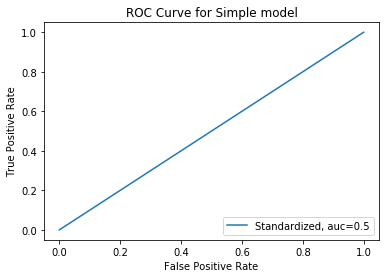

The model AUC is 0.50


In [8]:
# Let's see how much lift the model gives.  The area under the curve is 0.50 

from sklearn import metrics
fpr,tpr,_ = metrics.roc_curve(y_test, None_Pred)

auc = metrics.roc_auc_score(y_test, None_Pred)

plt.plot(fpr,tpr,label="Standardized, auc="+str(auc))  
plt.title('ROC Curve for Simple model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [9]:
# NOTE the target variable is unbalanced:  4,640 Yes and 36,548 No
# This needs to be addressed.

# Load data, standardize data, split into Train and Test data sets
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


for(columnName, columnData) in bank.iteritems():
    print('Column Name: ', columnName)
    print()
    print('Column Value      Counts')
    print(columnData.value_counts())
    print()
    print()

Column Name:  age

Column Value      Counts
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


Column Name:  job

Column Value      Counts
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1

#### Support Vector Machine

In [10]:
#  Create a Function that automatically one-hot-encodes the categorical values for this data set.  
#  create the list of categorical variables I want to focus on 

# Load data and look at the first 5 rows of the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


# Then iterate for each of the categorical variables to create  dummy variables.   But the key thing here is to
# add a prefix of the variable, then the categories.  Why? Because a few variables have 'unknown' and they need
# to be distinquished from each other.  Then drop the original columns.

for var in cat_vars:
    cat_list='var'+'_'+var                             # I don't understand how this works.
    cat_list = pd.get_dummies(bank[var], prefix=var)
    bank1=bank.join(cat_list)                          # Create a new df that joins all the dummy dfs
    bank = bank1                                        # Rename bank1 to bank
bank_vars = bank.columns.values.tolist()                 # Create a new list of variables that includes all dummy variables
to_keep = [i for i in bank_vars if i not in cat_vars]   # Eliminate the original column names.


# Drop the feature 'duration' because we can't know the duration of the conversation in advance.  

bank = bank[to_keep]
bank.drop(['duration'], axis = 1, inplace = True)


In [11]:
# Create data and target sets; standardize and create test and train sets

X = np.array(bank.ix[:, bank.columns != 'y'])
y = np.array(bank.ix[:, bank.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)


Shape of X: (41188, 62)
Shape of y: (41188, 1)
The dimensions of the training set are:  (28831, 62)
The dimensions of the test set are:      (12357, 62)


In [12]:
'''
OPTIONAL  -- This ends up creating a large set that Chokes the computer during the SVM because it's too 
computationally intensive.

AND even creating the balanced dataset that includes all the categorical values one-hot-encoded takes 
a LOT of computation- therefore, do this once and use this set for each of the models.

One way to decrease the computation needed is to reduce the features in advance using other methods.

'''

#  Balance the data set making y = 1 and y = 0 each 50% of the training data
#  Do a combination of undersampling and oversampling using SMOTE-Tomek method- focuses on Tomek boundary of y = 0 and 1

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

"\nOPTIONAL  -- This ends up creating a large set that Chokes the computer during the SVM because it's too \ncomputationally intensive.\n\nAND even creating the balanced dataset that includes all the categorical values one-hot-encoded takes \na LOT of computation- therefore, do this once and use this set for each of the models.\n\nOne way to decrease the computation needed is to reduce the features in advance using other methods.\n\n"

Resampled dataset shape Counter({'no': 25367, 'yes': 25367})
[[ 0.86519527 -0.2031762   0.19546384 -0.34684535  0.64721154  0.71897415
   0.88469754  0.71121074  0.3318535  -0.58345149  1.85850474 -0.19063253
  -0.1634272  -0.27433921 -0.20875956 -0.18787965 -0.32745042 -0.14824724
  -0.4430095  -0.15786074 -0.08908397 -0.35563317  0.81229045 -0.62867195
  -0.04450792 -0.33377635 -0.2411922   2.40860297 -0.55043461 -0.02281544
  -0.38185746 -0.64799427 -0.20866907 -1.95356212  1.95376808 -0.00588949
   1.10036208 -0.15647038 -1.0487394   0.45976794 -0.15647038 -0.42107493
  -1.31813003  1.31813003 -0.26041278 -0.41775872 -0.06677922 -0.46203571
  -0.38536755 -0.11556945  1.41469195 -0.33281282 -0.13512778 -0.12010809
  -0.48307246 -0.51080604 -0.51517526  2.03879385 -0.50031431 -0.33652933
   0.3953386  -0.18599163]]
['no']


(28831, 62)

(28831, 1)

(50734, 62)

(50734,)

In [319]:
# Import the SVM classifier and train model SVC_1 on the numerical train data (standradized)
# look at the settings of SVC_1
# Result was 0.90 accuracy, but 0.19 recall of for y = 1, AUC = 0.69 for model without rebalancing.
# Also looked at SVM with rebalancing - but it took ALOT more time to process becaue of the increased # of training data
# Actually- MODEL GETS STUCK i I use SMOTE Tomek to balance.

# Results when duration was taken out because in real life- duration will not be known in advance.

from sklearn.svm import SVC, LinearSVC
SVC_1= SVC(probability=True)
SVC_1.fit(X_train, y_train)

# Make predictions using the trained model SCV_1 and look at performance measures
SVC_1Pred = SVC_1.predict(X_test)

# Find accuracy of model SVC_1
print()
print("Accuracy of SVC_1 model is {:.2f}".format(metrics.accuracy_score(y_test, SVC_1Pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, SVC_1Pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, F1-score etc. of SVC_1 model
print(classification_report(y_test, SVC_1Pred))

'''
#  EXAMPLE TUNING SVM PARAMETERS - NOT DONE YET

# Test using the following values for coefficient 'c'
c_coeff=np.array([5**-3,5**-2,5**-1,1,5,5**2,5**3])

# Iterate across all 'c' coefficients for non-standardized data
for i in c_coeff:
    print(i)
    SVC_1=SVC_1(C=i,kernel='linear')
    SVC_1=SVC_1.fit(X_train,y_train)
    
# Iterate across all 'c' coefficients for standardized data
t1=time()
for i in c_coeff:
    print(i)
    svf_std=SVC_1(C=i,kernel='linear')
    svf_std=svf_std.fit(X_train_sc,y_train)'''

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

"\n#  EXAMPLE TUNING SVM PARAMETERS\n\n# Test using the following values for coefficient 'c'\nc_coeff=np.array([5**-3,5**-2,5**-1,1,5,5**2,5**3])\n\n# Iterate across all 'c' coefficients for non-standardized data\nfor i in c_coeff:\n    print(i)\n    SVC_1=SVC_1(C=i,kernel='linear')\n    SVC_1=SVC_1.fit(X_train,y_train)\n    \n# Iterate across all 'c' coefficients for standardized data\nt1=time()\nfor i in c_coeff:\n    print(i)\n    svf_std=SVC_1(C=i,kernel='linear')\n    svf_std=svf_std.fit(X_train_sc,y_train)"


Accuracy of SVC_1 model is 0.83
Confusion Matrix:
[[9453 1516]
 [ 588  800]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10969
           1       0.35      0.58      0.43      1388

    accuracy                           0.83     12357
   macro avg       0.64      0.72      0.67     12357
weighted avg       0.87      0.83      0.85     12357



Text(0.5, 1.0, 'ROC Curve for SVM model')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

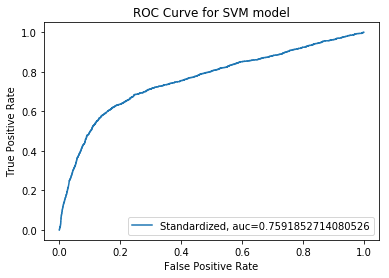

The model AUC is 0.76


In [320]:
# Let's see how much lift the model gives.  The area under the curve is 0.69 without rebalancing.

# Using SMOTE-Tomek,Takes a VERY long time between SMOTE-Tomek + SVC

from sklearn import metrics
y_pred_proba = SVC_1.predict_proba(X_test)[::,1]
# y_pred_proba = KNN_1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
# fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Standardized, auc="+str(auc))  
plt.title('ROC Curve for SVM model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [94]:
'''
#  Try cross-validation and get accuracy

from sklearn.model_selection import cross_val_score
acc_SVM_1 = cross_val_score(SVC_1,X_train,y_train,cv=5)
print(acc_SVM_1.mean())

# Calculate precision, recall, F1-score etc. of KNN_1 model
print(classification_report(y_test, SVC_1Pred))
'''


'\n#  Try cross-validation and get accuracy\n\nfrom sklearn.model_selection import cross_val_score\nacc_SVM_1 = cross_val_score(SVC_1,X_train,y_train,cv=5)\nprint(acc_SVM_1.mean())\n\n# Calculate precision, recall, F1-score etc. of KNN_1 model\nprint(classification_report(y_test, SVC_1Pred))\n'

In [118]:
#  EXAMPLE TUNING SVM PARAMETERS

# Test using the following values for coefficient 'c'
c_coeff=np.array([5**-3,5**-2,5**-1,1,5,5**2,5**3])

# Iterate across all 'c' coefficients for non-standardized data
for i in c_coeff:
    print(i)
    svf=SVC_1(C=i,kernel='linear')
    svf=svf.fit(X_train,y_train)
    
# Iterate across all 'c' coefficients for standardized data
t1=time()
for i in c_coeff:
    print(i)
    svf_std=SVC(C=i,kernel='linear')
    svf_std=svf_std.fit(X_train_sc,y_train)

0.008


TypeError: 'SVC' object is not callable

,0,1,2,3,4,5,6,7,8,9
0,-0.285211,-0.243992,-0.564388,0.195464,-0.346845,-1.196657,-1.180542,-1.230776,-1.323449,-0.937094
1,1.344531,-0.170508,-0.564388,0.195464,-0.346845,-2.213963,-1.977615,2.935411,-1.653814,-2.063820
2,0.865195,2.146168,-0.203176,0.195464,-0.346845,0.647212,0.718974,0.884698,0.711211,0.331853


#### Heat Map of Correlation Matrix

Using only the numerical columns, the heat map below shows a few of the data columns are highly correlated with each other and therefore some can safely be eliminated.  

Highly correlated variables are:
*  nr.employed_____________ and     euribor3m___________0.95
*  emp.var.rate____________ and     euribor3m___________0.97
*  emp.var.rate____________ and     nr.employed_________0.91
*  emp.var.rate____________ and     con.price.idx________0.78
*  previous________________ and     pdays_____________- 0.59

Text(0.5, 1.0, 'Pearson Correlation of Numeric Features of Bank Data Set')

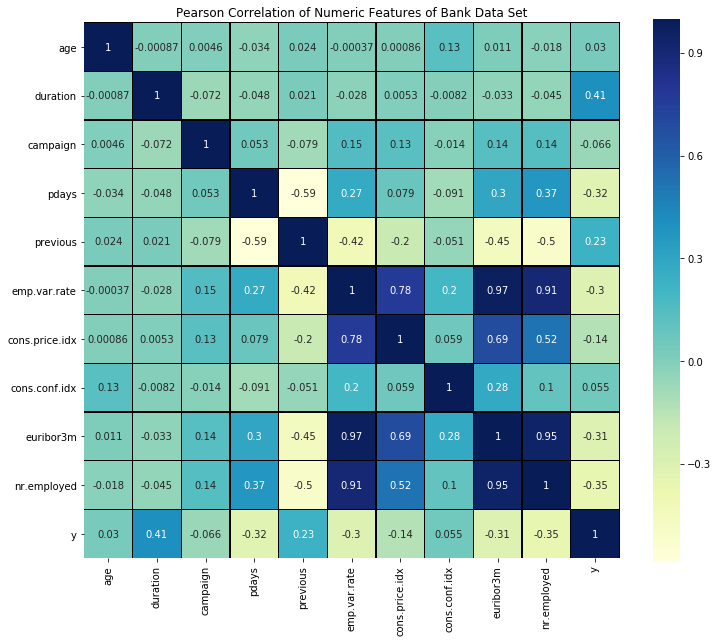

In [191]:
#  HEAT MAP CORRELATION MATRIX on data2, which is the numeric columns of the bank data set.

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Numeric Features of Bank Data Set')
# Draw the heatmap using seaborn  

sns.heatmap(pd.DataFrame(data2.astype(float)).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)



#### Random Forest

In [34]:
# Create dummy variables in education, marital, default, housing, loan, job and contact.  
# Drop the original columns in both and keep the numerical columns I want to keep

#  NOTE    duration is dropped because duration of phone call can't be known in advance


# the train and test sets and concatenate the dummy variables with the train and test datasets.

# First re-load the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# create dummy variable matrices for the 5 categories

education = pd.get_dummies(bank['education'],drop_first = True)
marital =   pd.get_dummies(bank['marital'], drop_first = True)
default =   pd.get_dummies(bank['default'], drop_first = True)
housing =   pd.get_dummies(bank['housing'], drop_first = True)
loan =      pd.get_dummies(bank['loan'], drop_first = True)
job =       pd.get_dummies(bank['job'], drop_first = True)
contact =   pd.get_dummies(bank['contact'], drop_first = True)

# Drop the original columns
bank.drop(['education','marital', 'default', 'housing', 'loan','job', 'contact'], axis=1,inplace=True)

# Drop more columns for now.
bank.drop(['month', 'day_of_week', 'poutcome','duration' ], axis=1,inplace=True)

#  Concatenate the dummy variables to the data set.  axis = 1 mean to concatenat by columns
bank = pd.concat([bank, education, marital, default, housing, loan, job, contact], axis = 1)

print(bank.shape)
print(bank.head(5))

#  Many 'unknown' categories- don't worry- the computer will differentiate them as separate category.

# Create data and target sets; standardize and create test and train sets

X = np.array(bank.ix[:, bank.columns != 'y'])
y = np.array(bank.ix[:, bank.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)


(41188, 38)
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  housemaid  management  \
0          -36.4      4.857       5191.0  0  ...          1           0   
1          -36.4      4.857       5191.0  0  ...          0           0   
2          -36.4      4.857       5191.0  0  ...          0           0   
3          -36.4      4.857       5191.0  0  ...          0           0   
4          -36.4      4.857       5191.0  0  ...          0           0   

   retired  self-employed  services  student  technician  unemployed  unknown  \
0        0              0         0        0         

In [278]:
#  OR use numerical features only
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# How Balanced are the values in the target variable, 'y'?
print(bank['y'].value_counts()/bank['y'].count())
print(bank['y'].count())

# Get all numerical variables and target variable 'y'

featuresNUM = ['age', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']
data2 = bank[featuresNUM]
data2.head(3)

X = np.array(data2.ix[:, data2.columns != 'y'])
y = np.array(data2.ix[:, data2.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix

print(X_train.shape)
print(X_test.shape)

0    0.887346
1    0.112654
Name: y, dtype: float64
41188


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


Shape of X: (41188, 9)
Shape of y: (41188, 1)
Number transactions X_train dataset:  (28831, 9)
Number transactions y_train dataset:  (28831, 1)
Number transactions X_test dataset:  (12357, 9)
Number transactions y_test dataset:  (12357, 1)
(28831, 9)
(12357, 9)


In [284]:

# OPTIONAL  -  In this case rebalancing yields much worse accuracy, but much better recall.  SO NOT DONE HERE

#  Rebalance the minority  using SMOTE-Tomek

#  Do a combination of undersampling and oversampling using SMOTE-Tomek method- focuses on Tomek boundary of y = 0 and 1

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

Resampled dataset shape Counter({0: 25119, 1: 25119})
[[ 0.86519527 -0.2031762   0.19546384 -0.34684535  0.64721154  0.71897415
   0.88469754  0.71121074  0.3318535  -0.2411922   2.40860297 -0.55043461
  -0.02281544 -0.38185746 -0.64799427 -0.20866907  0.81229045 -0.62867195
  -0.04450792  1.95376808 -0.00588949 -0.15647038 -1.0487394  -0.15647038
  -0.42107493  1.85850474 -0.19063253 -0.1634272  -0.27433921 -0.20875956
  -0.18787965 -0.32745042 -0.14824724 -0.4430095  -0.15786074 -0.08908397
   1.31813003]]
[0]


(28831, 37)

(28831, 1)

(50238, 37)

(50238,)

In [49]:
# Import the RandomForestClassifier and train model RFC_1 on the numerical train data (standradized)
# look at the settings of RFC_1  -  Random Forest Classifier 1

from sklearn.ensemble import RandomForestClassifier

#Create Random Forest Classifier model object
RFC_1 = RandomForestClassifier(random_state = 0, n_jobs = -1)
RFC_1.fit(X_train,y_train)

# Make predictions using the trained model RFC_1, compare to label and look at performance measures
RFC_1Pred = RFC_1.predict(X_test)

# Find accuracy of model RFC_1
print()
print("Accuracy of RFC_1 model is {:.2f}".format(metrics.accuracy_score(y_test, RFC_1Pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, RFC_1Pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, F1-score etc. of RFC_1 model
print(classification_report(y_test, RFC_1Pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


Accuracy of RFC_1 model is 0.32
Confusion Matrix:
[[2748 8221]
 [ 237 1151]]
              precision    recall  f1-score   support

          no       0.92      0.25      0.39     10969
         yes       0.12      0.83      0.21      1388

    accuracy                           0.32     12357
   macro avg       0.52      0.54      0.30     12357
weighted avg       0.83      0.32      0.37     12357



"# For numerical features only\nfeaturesNUM = list(data2.columns)\nfeaturesNUM.remove('y')\n"

campaign                         9.123409e-02
euribor3m                        8.265992e-02
emp.var.rate                     8.217420e-02
nr.employed                      7.225601e-02
age                              6.079423e-02
housing_yes                      3.545677e-02
poutcome_success                 3.163606e-02
cons.price.idx                   3.141926e-02
housing_no                       2.916738e-02
day_of_week_fri                  2.699284e-02
marital_married                  2.570795e-02
contact_telephone                2.486310e-02
day_of_week_thu                  2.203816e-02
month_may                        1.977303e-02
contact_cellular                 1.959039e-02
day_of_week_tue                  1.945969e-02
marital_single                   1.942826e-02
day_of_week_mon                  1.937895e-02
day_of_week_wed                  1.839898e-02
cons.conf.idx                    1.822861e-02
education_university.degree      1.606277e-02
education_high.school            1

<Figure size 720x2160 with 0 Axes>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Column Importance in Random Forest Predictions')

No handles with labels found to put in legend.


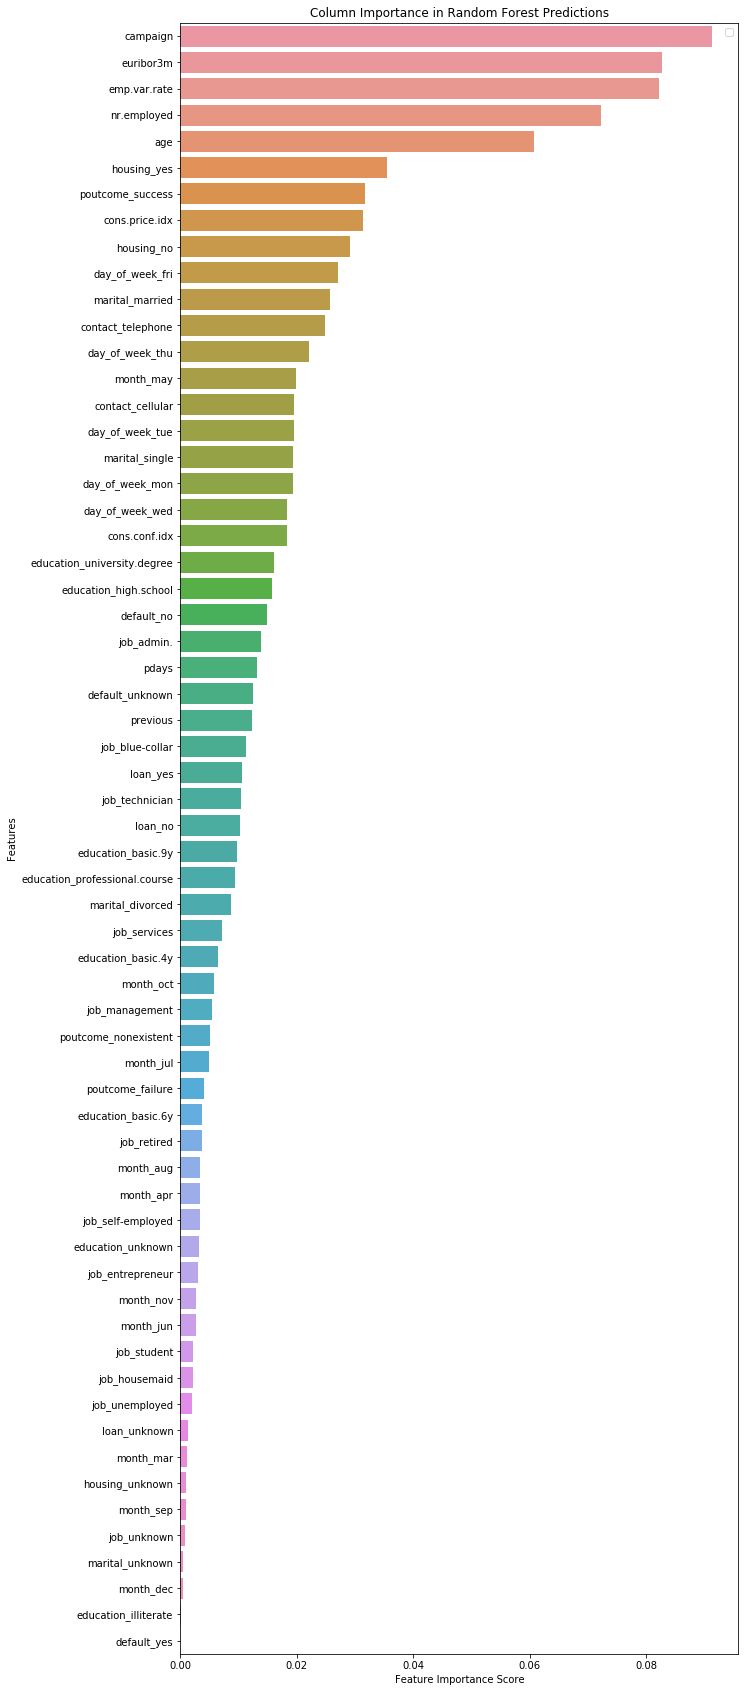

In [46]:
#  Random Forest can rank the importance of the features.


# For categorical and numerical features
featuresNUM = list(bank.columns)
featuresNUM.remove('y')

'''# For numerical features only
featuresNUM = list(data2.columns)
featuresNUM.remove('y')
'''

import pandas as pd
feature_imp = pd.Series(RFC_1.feature_importances_,featuresNUM).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(10,30))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Column Importance in Random Forest Predictions")
plt.legend()
plt.show()

In [ ]:
# Let's see how much lift the model gives.  The area under the curve is 0.75.
# With SMOTE-Tomek balancing  AUC = 0.60

from sklearn import metrics
y_pred_proba = RFC_1.predict_proba(X_test)[::,1]
# y_pred_proba = KNN_1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
# fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Standardized, auc="+str(auc))  
plt.title('ROC Curve for RFC model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [56]:
y_test[0:4,]


array([['yes'],
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [50]:
# Let's see how much lift the model gives.  The area under the curve is 0.75.
# With SMOTE-Tomek balancing  AUC = 0.60

from sklearn import metrics
y_pred_proba = RFC_1.predict_proba(X_test)[::,1]
#y_pred_proba = KNN_1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
# fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Standardized, auc="+str(auc))  
plt.title('ROC Curve for RFC model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

ValueError: Data is not binary and pos_label is not specified

#### Naive-Bayes

Because NB assumes all variables are independent, the features will be the first 5 from the Random Forest Importance graph because these seem fairly independent of each other:

* eruobor3m  - the interbank interest rate
* age        - age of the customer prspect
* emp.var.rate - employment variation (economic stability measure)
* nr.employed - prestige of the bank (number of employees, size)
* cons.conf.idx - consumer confidence index

Results without balancing:

              precision    recall  f1-score   support

           0       0.94      0.85      0.90     10969
           1       0.34      0.60      0.44      1388

    accuracy                           0.82     12357
    macro avg      0.64      0.73      0.67     12357
    weighted avg   0.88      0.82      0.84     12357
    
#### AUC is 0.75

See code below:

In [295]:
# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# How Balanced are the values in the target variable, 'y'?
print(bank['y'].value_counts()/bank['y'].count())
print(bank['y'].count())


# Get all numerical variables and target variable 'y'

featuresNUM = ['age','emp.var.rate',  'cons.conf.idx', 'euribor3m', 'nr.employed','y']
data2 = bank[featuresNUM]
data2.head(3)

X = np.array(data2.ix[:, data2.columns != 'y'])
y = np.array(data2.ix[:, data2.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)

#  NOTE  Attempted to Balance target classes using SMOTE, but theaccuracy went down to 0.79

0    0.887346
1    0.112654
Name: y, dtype: float64
41188


,age,emp.var.rate,cons.conf.idx,euribor3m,nr.employed,y
0,56,1.1,-36.4,4.857,5191.0,0
1,57,1.1,-36.4,4.857,5191.0,0
2,37,1.1,-36.4,4.857,5191.0,0


Shape of X: (41188, 5)
Shape of y: (41188, 1)
The dimensions of the training set are:  (28831, 5)
The dimensions of the test set are:      (12357, 5)


In [166]:
'''#   DO NOT USE FOR NAIVE BAYES   TOO MANY COLLINEAR VARIABLES- TOO COMPUTATIONALLY INTENSIVE


# Create dummy variables in education, marital, default, housing, loan, job and contact.  
# Drop the original columns in both and keep the numerical columns I want to keep

#  NOTE    duration is dropped because duration of phone call can't be known in advance


# the train and test sets and concatenate the dummy variables with the train and test datasets.

# First re-load the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# create dummy variable matrices for the 5 categories

education = pd.get_dummies(bank['education'],drop_first = True)
marital =   pd.get_dummies(bank['marital'], drop_first = True)
default =   pd.get_dummies(bank['default'], drop_first = True)
housing =   pd.get_dummies(bank['housing'], drop_first = True)
loan =      pd.get_dummies(bank['loan'], drop_first = True)
job =       pd.get_dummies(bank['job'], drop_first = True)
contact =   pd.get_dummies(bank['contact'], drop_first = True)

# Drop the original columns
bank.drop(['education','marital', 'default', 'housing', 'loan','job', 'contact'], axis=1,inplace=True)

# Drop more columns for now.
bank.drop(['month', 'day_of_week', 'poutcome','duration' ], axis=1,inplace=True)

#  Concatenate the dummy variables to the data set.  axis = 1 mean to concatenat by columns
bank = pd.concat([bank, education, marital, default, housing, loan, job, contact], axis = 1)

print(bank.shape)
print(bank.head(5))

#  Many 'unknown' categories- don't worry- the computer will differentiate them as separate category.

# Create data and target sets; standardize and create test and train sets

X = np.array(bank.ix[:, bank.columns != 'y'])
y = np.array(bank.ix[:, bank.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)
'''

(41188, 38)
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  housemaid  management  \
0          -36.4      4.857       5191.0  0  ...          1           0   
1          -36.4      4.857       5191.0  0  ...          0           0   
2          -36.4      4.857       5191.0  0  ...          0           0   
3          -36.4      4.857       5191.0  0  ...          0           0   
4          -36.4      4.857       5191.0  0  ...          0           0   

   retired  self-employed  services  student  technician  unemployed  unknown  \
0        0              0         0        0         

In [296]:

# OPTIONAL    SKIP THIS STEP    Acuracy goes down to 0.72 even though recall goes to 0.70

#  Rebalance the minority  using SMOTE-Tomek

#  Do a combination of undersampling and oversampling using SMOTE-Tomek method- focuses on Tomek boundary of y = 0 and 1

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

Resampled dataset shape Counter({0: 25317, 1: 25317})
[[0.86519527 0.64721154 0.88469754 0.71121074 0.3318535 ]]
[0]


(28831, 5)

(28831, 1)

(50634, 5)

(50634,)

In [297]:
# Import the required libraries to run Naive-Bayes models.   Let's try Gaussian first

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create Gaussian Naive-Bayes model object:  GNB_1
GNB_1 = GaussianNB()

# Create the model GNB_1 by fitting to training data
GNB_1.fit(X_train, y_train)


# predict the target on the train dataset
GNB_1Pred = GNB_1.predict(X_test)
print('Target on train data',GNB_1Pred) 

# Find accuracy of model GNB_1_1
print()
print("Accuracy of GNB_1 model is {:.2f}".format(metrics.accuracy_score(y_test, GNB_1Pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, GNB_1Pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, F1-score etc. of RFC_1 model
print(classification_report(y_test, GNB_1Pred))


GaussianNB(priors=None, var_smoothing=1e-09)

Target on train data [0 1 0 ... 1 0 0]

Accuracy of GNB_1 model is 0.72
Confusion Matrix:
[[7883 3086]
 [ 415  973]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10969
           1       0.24      0.70      0.36      1388

    accuracy                           0.72     12357
   macro avg       0.59      0.71      0.59     12357
weighted avg       0.87      0.72      0.77     12357



Text(0.5, 1.0, 'ROC Curve for GNB_1 model')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

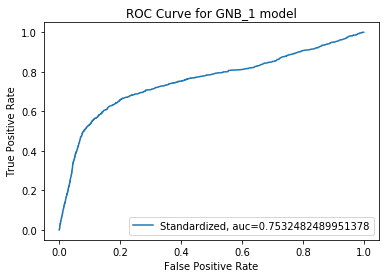

The model AUC is 0.75


In [298]:
# Let's see how much lift the model gives.  The area under the curve is 0.75.
# With SMOTE-Tomek balancing  AUC = 0.75

from sklearn import metrics
y_pred_proba = GNB_1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Standardized, auc="+str(auc))  
plt.title('ROC Curve for GNB_1 model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [219]:
#  Now lets try the Random Forest Regressor and see if it gets a better result.

#   NO !!!  Classification metrics can't handle a mix of binary and continuous targets,  MAKE 'y' 0 TO 1
#  Not sure if that makes sense...

# Import the Random Forest Regressor and train model RFR_1 on the numerical train data (standradized)
# look at the settings of RFR_1  -  Random Forest Regressor 1


from sklearn.ensemble import RandomForestRegressor

#Create Random Forest Regressor model object
RFR_1 = RandomForestRegressor(random_state = 0, n_jobs = -1)
RFR_1.fit(X_train,y_train)

# Make predictions using the trained model RFR_1, compare to label and look at performance measures
RFR_1Pred = RFR_1.predict(X_test)

# Find accuracy of model RFR_1
print()
print("Accuracy of RFR_1 model is {:.2f}".format(metrics.accuracy_score(y_test, RFR_1Pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, RFR_1Pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, F1-score etc. of RFR_1 model
print(classification_report(y_test, RFR_1Pred))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [220]:
# Let's see how much lift the model gives.  The area under the curve is 0.91.

from sklearn import metrics
y_pred_proba = RFR_1.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="Standardized, auc="+str(auc))  
plt.title('ROC Curve for RFR model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'

###   KNN      Standardized, but Not Balanced 

Not balancing the classes results in a  better accuracy, recall and AUC for KNN Model.

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10969
           1       0.54      0.28      0.37      1388

    accuracy                           0.89     12357
    macro avg      0.73      0.62      0.65     12357
    weighted avg   0.87      0.89      0.88     12357


     
#### The model AUC is 0.89

NOTE:     Using SMOTE-Tomek balancing, accuracy went to 0.86 and AUC went to 0.67, precision and recall stayed the same.



See code below:

In [150]:
# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# How Balanced are the values in the target variable, 'y'?
print(bank['y'].value_counts()/bank['y'].count())
print(bank['y'].count())

# Get all numerical variables and target variable 'y'

featuresNUM = ['age', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']
data2 = bank[featuresNUM]
data2.head(3)

X = np.array(data2.ix[:, data2.columns != 'y'])
y = np.array(data2.ix[:, data2.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix

print(X_train.shape)
print(X_test.shape)

0    0.887346
1    0.112654
Name: y, dtype: float64
41188


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


Shape of X: (41188, 9)
Shape of y: (41188, 1)
Number transactions X_train dataset:  (28831, 9)
Number transactions y_train dataset:  (28831, 1)
Number transactions X_test dataset:  (12357, 9)
Number transactions y_test dataset:  (12357, 1)
(28831, 9)
(12357, 9)


In [299]:
# Create dummy variables in education, marital, default, housing, loan, job and contact.  
# Drop the original columns in both and keep the numerical columns I want to keep

#  NOTE    duration is dropped because duration of phone call can't be known in advance


# the train and test sets and concatenate the dummy variables with the train and test datasets.

# First re-load the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# create dummy variable matrices for the 5 categories

education = pd.get_dummies(bank['education'],drop_first = True)
marital =   pd.get_dummies(bank['marital'], drop_first = True)
default =   pd.get_dummies(bank['default'], drop_first = True)
housing =   pd.get_dummies(bank['housing'], drop_first = True)
loan =      pd.get_dummies(bank['loan'], drop_first = True)
job =       pd.get_dummies(bank['job'], drop_first = True)
contact =   pd.get_dummies(bank['contact'], drop_first = True)

# Drop the original columns
bank.drop(['education','marital', 'default', 'housing', 'loan','job', 'contact'], axis=1,inplace=True)

# Drop more columns for now.
bank.drop(['month', 'day_of_week', 'poutcome','duration' ], axis=1,inplace=True)

#  Concatenate the dummy variables to the data set.  axis = 1 mean to concatenat by columns
bank = pd.concat([bank, education, marital, default, housing, loan, job, contact], axis = 1)

print(bank.shape)
print(bank.head(5))

#  Many 'unknown' categories- don't worry- the computer will differentiate them as separate category.

# Create data and target sets; standardize and create test and train sets

X = np.array(bank.ix[:, bank.columns != 'y'])
y = np.array(bank.ix[:, bank.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)


(41188, 38)
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  housemaid  management  \
0          -36.4      4.857       5191.0  0  ...          1           0   
1          -36.4      4.857       5191.0  0  ...          0           0   
2          -36.4      4.857       5191.0  0  ...          0           0   
3          -36.4      4.857       5191.0  0  ...          0           0   
4          -36.4      4.857       5191.0  0  ...          0           0   

   retired  self-employed  services  student  technician  unemployed  unknown  \
0        0              0         0        0         

In [177]:

# OPTIONAL  --- Note it does not improve KNN model---so skip this step.

#  Rebalance the minority  using SMOTE-Tomek

#  Do a combination of undersampling and oversampling using SMOTE-Tomek method- focuses on Tomek boundary of y = 0 and 1

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

Resampled dataset shape Counter({0: 25119, 1: 25119})
[[ 0.86519527 -0.2031762   0.19546384 -0.34684535  0.64721154  0.71897415
   0.88469754  0.71121074  0.3318535  -0.2411922   2.40860297 -0.55043461
  -0.02281544 -0.38185746 -0.64799427 -0.20866907  0.81229045 -0.62867195
  -0.04450792  1.95376808 -0.00588949 -0.15647038 -1.0487394  -0.15647038
  -0.42107493  1.85850474 -0.19063253 -0.1634272  -0.27433921 -0.20875956
  -0.18787965 -0.32745042 -0.14824724 -0.4430095  -0.15786074 -0.08908397
   1.31813003]]
[0]


(28831, 37)

(28831, 1)

(50238, 37)

(50238,)

In [179]:
# Import the KNN classifier and train model KNN_1 on the numerical train data

from sklearn.neighbors import KNeighborsClassifier
KNN_1 = KNeighborsClassifier()
KNN_1.fit(X_train, y_train)

# Look at values chosen by KNN model
# KNN_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [180]:
# Use the trained KNN_1 model to make predictions on the unlabeled X_test data set from data2
# Accuracy did not improve by standardizing the data for this model, but we will leave it standardized.


KNN_1Pred = KNN_1.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, KNN_1Pred)
print("Confusion Matrix:")
print(confusion_matrix)


# Find accuracy of model KNN_1
print()
print("Accuracy of KNN_1 model is {:.2f}".format(metrics.accuracy_score(y_test, KNN_1Pred)))

#  This original KNN model has similar accuracy to the tree models:   0.90 KNN numerical   
#  Accuracy went to 0.87 using balanced numerical only...BAD   WHY???


Confusion Matrix:
[[10636   333]
 [ 1015   373]]

Accuracy of KNN_1 model is 0.89


In [182]:
# Calculate precision, recall, F1-score etc. of KNN_1 model
print(classification_report(y_test, KNN_1Pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10969
           1       0.53      0.27      0.36      1388

    accuracy                           0.89     12357
   macro avg       0.72      0.62      0.65     12357
weighted avg       0.87      0.89      0.87     12357



Text(0.5, 1.0, 'ROC Curve for KNN_1 model')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

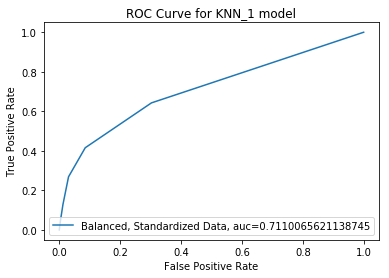

The model AUC is 0.71


In [183]:
# Let's see how much lift the model gives.  The area under the curve is 0.89.

from sklearn import metrics
y_pred_proba = KNN_1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Balanced, Standardized Data, auc="+str(auc))
plt.title('ROC Curve for KNN_1 model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

# When using data2, the AUC is .87;   When using one-hot encoded AUC is worse.

####  KNN   Standardized, Balanced with SMOTE, numerical and categorical (one-hot-encoded)

This yielded the worst accuracy, precision, recall and AUC  of the three KNN models attempted.  

              precision    recall  f1-score   support

           0       0.94      0.78      0.86     10969
           1       0.27      0.63      0.38      1388

    accuracy                           0.76     12357
    macro avg      0.61      0.71      0.62     12357
    weighted avg   0.87      0.76      0.80     12357

#### The model AUC is 0.75

See code below:

In [214]:
# Load data and look at the first 5 rows of the data set  SMOTE FOR NUMERICAL AND CATEGORICAL COLUMNS
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

# First, make target variable numerical:  0 and 1 in the original file "bank"
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# # One-Hot-Encode some categorical variables:  create dummy variable matrices for the 5 categories

education = pd.get_dummies(bank['education'],drop_first = True)
marital =   pd.get_dummies(bank['marital'], drop_first = True)
default =   pd.get_dummies(bank['default'], drop_first = True)
housing =   pd.get_dummies(bank['housing'], drop_first = True)
loan =      pd.get_dummies(bank['loan'], drop_first = True)

# Drop the original columns
bank.drop(['education','marital', 'default', 'housing', 'loan'], axis=1,inplace=True)

# Drop more columns for now.
bank.drop(['job','campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 
           'nr.employed', 'contact', 'month', 'day_of_week', 'poutcome' ], axis=1,inplace=True)

X = np.array(bank.ix[:, bank.columns != 'y'])  # Creates Input or Feature data set
y = np.array(bank.ix[:, bank.columns == 'y'])  # Creates output or target data set
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


# OPTIONAL  -  In this case rebalancing yields much worse accuracy, but much better recall.  SO NOT DONE HERE

#  Rebalance the minority  using SMOTE-Tomek

#  Do a combination of undersampling and oversampling using SMOTE-Tomek method- focuses on Tomek boundary of y = 0 and 1

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

Shape of X: (41188, 2)
Shape of y: (41188, 1)
Number transactions X_train dataset:  (28831, 2)
Number transactions y_train dataset:  (28831, 1)
Number transactions X_test dataset:  (12357, 2)
Number transactions y_test dataset:  (12357, 1)
Resampled dataset shape Counter({0: 25334, 1: 25334})
[[ 49 813]]
[0]


(28831, 2)

(28831, 1)

(50668, 2)

(50668,)

In [143]:
# Import the KNN classifier and train model KNN_q on the numerical train data    DID NOT WORK WELL   ARGGGHHH!!!

from sklearn.neighbors import KNeighborsClassifier
KNN_2 = KNeighborsClassifier()
KNN_2.fit(X_train_bal, y_train_bal)

# Look at values chosen by KNN model
# KNN_2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [144]:
# Use the trained KNN_1 model to make predictions on the unlabeled data2_test data set.
# Accuracy did not improve by standardizing the data for this model, but we will leave it stadardized.


KNN_2Pred = KNN_2.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, KNN_2Pred)
print("Confusion Matrix:")
print(confusion_matrix)


# Find accuracy of model KNN_2
print()
print("Accuracy of KNN_2 model is {:.2f}".format(metrics.accuracy_score(y_test, KNN_2Pred)))

#  This KNN model has similar accuracy to the tree models:   0.90 KNN numerical   
#  OMG the accuracy went down to 0.76  HORRIBLE   WHY???

Confusion Matrix:
[[8571 2398]
 [ 507  881]]

Accuracy of KNN_2 model is 0.76


In [145]:
# Calculate precision, recall, F1-score etc. of KNN_1 model
print(classification_report(y_test, KNN_2Pred))


              precision    recall  f1-score   support

           0       0.94      0.78      0.86     10969
           1       0.27      0.63      0.38      1388

    accuracy                           0.76     12357
   macro avg       0.61      0.71      0.62     12357
weighted avg       0.87      0.76      0.80     12357



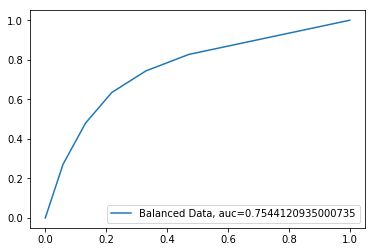

The model AUC is 0.75


In [146]:
# Let's see how much lift the model gives.  The area under the curve is 0.84.

from sklearn import metrics
y_pred_proba = KNN_2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Balanced Data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

# When using data2, the AUC is .87;   When using one-hot encoded AUC is worse.

### Logistic Regression model Using Standrdized Numerical  Features

The Logistic Regression model below is based on

*  Numerical features only
*  Each numerical feature is standardized
*  Target variable is balanced using SMOTE to 50%/50%, up from original 89%/11%

Results:  Accuracy = 0.90

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10969
           1       0.68      0.19      0.29      1388

    accuracy                           0.90     12357
    macro avg      0.79      0.59      0.62     12357
    weighted avg   0.88      0.90      0.87     12357
    
#### The model AUC is 0.75

See code below:

In [321]:
#   ALTERNATIVE  NUMERIC COLUMNS

## Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# How Balanced are the values in the target variable, 'y'?
print(bank['y'].value_counts()/bank['y'].count())
print(bank['y'].count())


# Get all numerical variables and target variable 'y'

featuresNUM = ['age','campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']
data2 = bank[featuresNUM]
data2.head(3)

X = np.array(data2.ix[:, data2.columns != 'y'])
y = np.array(data2.ix[:, data2.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)


0    0.887346
1    0.112654
Name: y, dtype: float64
41188


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


Shape of X: (41188, 9)
Shape of y: (41188, 1)
The dimensions of the training set are:  (28831, 9)
The dimensions of the test set are:      (12357, 9)


In [29]:
#  Create a Function that automatically one-hot-encodes the categorical values for this data set.  
#  create the list of categorical variables I want to focus on 

# Load data and look at the first 5 rows of the data set
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


# Then iterate for each of the categorical variables to create  dummy variables.   But the key thing here is to
# add a prefix of the variable, then the categories.  Why? Because a few variables have 'unknown' and they need
# to be distinquished from each other.  Then drop the original columns.

for var in cat_vars:
    cat_list='var'+'_'+var                             # Create a dummy variable name that has the variable and category
    cat_list = pd.get_dummies(bank[var], prefix=var)
    bank1=bank.join(cat_list)                          # Create a new df that joins all the dummy dfs
    bank = bank1                                        # Rename bank1 to bank
bank_vars = bank.columns.values.tolist()                 # Create a new list of variables that includes all dummy variables
to_keep = [i for i in bank_vars if i not in cat_vars]   # Eliminate the original column names.

bank = bank[to_keep]


# Create data and target sets; standardize and create test and train sets

X = np.array(bank.ix[:, bank.columns != 'y'])
y = np.array(bank.ix[:, bank.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix of standrdized numerical values

print("The dimensions of the training set are: ",  X_train.shape)
print("The dimensions of the test set are:     " , X_test.shape)


Shape of X: (41188, 63)
Shape of y: (41188, 1)
The dimensions of the training set are:  (28831, 63)
The dimensions of the test set are:      (12357, 63)


In [30]:
#  Balance the data set making y = 1 and y = 0 each 50% of the training data
#  Do a combination of undersampling and oversampling using SMOTE-Tomek method- focuses on Tomek boundary of y = 0 and 1
#  This takes *** 5 minutes ***  when one-hot-encoding all categorical variables for a total of 74


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE

smt = SMOTETomek(random_state=42)                   # Create object for the SMOTETomek over-sampling model
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

Resampled dataset shape Counter({0: 25519, 1: 25519})
[[ 0.86519527  2.14616834 -0.2031762   0.19546384 -0.34684535  0.64721154
   0.71897415  0.88469754  0.71121074  0.3318535  -0.58345149  1.85850474
  -0.19063253 -0.1634272  -0.27433921 -0.20875956 -0.18787965 -0.32745042
  -0.14824724 -0.4430095  -0.15786074 -0.08908397 -0.35563317  0.81229045
  -0.62867195 -0.04450792 -0.33377635 -0.2411922   2.40860297 -0.55043461
  -0.02281544 -0.38185746 -0.64799427 -0.20866907 -1.95356212  1.95376808
  -0.00588949  1.10036208 -0.15647038 -1.0487394   0.45976794 -0.15647038
  -0.42107493 -1.31813003  1.31813003 -0.26041278 -0.41775872 -0.06677922
  -0.46203571 -0.38536755 -0.11556945  1.41469195 -0.33281282 -0.13512778
  -0.12010809 -0.48307246 -0.51080604 -0.51517526  2.03879385 -0.50031431
  -0.33652933  0.3953386  -0.18599163]]
[0]


(28831, 63)

(28831, 1)

(51038, 63)

(51038,)

In [34]:
'''
Recursive Feature Elimination (RFE) repeatedly constructs a model, then chooses the best or worst performing feature.
That feature is kept and then the process is repeated with the rest of the features.  This process is applied until all
features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and 
smaller sets of features.
'''
bank_vars=bank.columns.values.tolist()
y=['y']
X=[i for i in bank_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)



'''
# Alternative approach from  ML in Python Cookbook using RFECV  which is RFE with cross-validation
# The RFECV recommends keeping 61 features out of the 74...that seems too high- 
# I better accuracy and recall using 37 in my previous model.  Those 37 were influenced by Exploratory Data Analysis.

from sklearn.feature_selection import RFECV
from sklearn.datasets import make_regression
from sklearn import datasets, linear_model

warnings.filterwarnings(action = "ignore", module = "scipy", message = "^internal gelsd")

ols = linear_model.LinearRegression()     # Create a linear regression model object
rfecv = RFECV(estimator = ols, step = 1, scoring = "neg_mean_squared_error" )

rfecv.fit(X_train, y_train)
rfecv.transform(X_train)

# Number of Features to keep
# The RFECV recommends keeping 61 features out of the 74...that seems too high- 
# I good good results with 37 in my previous model.
rfecv.n_features_   
'''



'\nRecursive Feature Elimination (RFE) repeatedly constructs a model, then chooses the best or worst performing feature.\nThat feature is kept and then the process is repeated with the rest of the features.  This process is applied until all\nfeatures in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and \nsmaller sets of features.\n'

[False  True  True  True False  True  True False  True  True False False
 False False False False False False False False False False  True False
 False False False False False False False False  True False  True  True
 False False False False  True False False  True  True False  True False
 False  True  True  True  True False False False False False False False
  True False False]
[31  1  1  1  3  1  1 15  1  1  9 36 13 12 10  2 27 37  7  8 11 38  1 35
 25 32 44 22 24 23 29 42  1 41  1  1 26 40 21 28  1 33 20  1  1 34  1 39
 16  1  1  1  1 14  6  4 30 43 17 18  1 19  5]


'# Alternative approach from  ML in Python Cookbook using RFECV  which is RFE with cross-validation\nfrom sklearn.feature_selection import RFECV\nfrom sklearn.datasets import make_regression\nfrom sklearn import datasets, linear_model\n\nwarnings.filterwarnings(action = "ignore", module = "scipy", message = "^internal gelsd")\n\nols = linear_model.LinearRegression()     # Create a linear regression model object\nrfecv = RFECV(estimator = ols, step = 1, scoring = "neg_mean_squared_error" )\n\nrfecv.fit(X_train, y_train)\nrfecv.transform(X_train)\n\n# Number of Features to keep\n# The RFECV recommends keeping 61 features out of the 74...that seems too high- \n# I good good results with 37 in my previous model.\nrfecv.n_features_   \n'

In [19]:
# print('Resampled dataset shape %s' % Counter(X_res))
print(X_res[2:3,:])
print(y_res[2:3])

X_train.shape
y_train.shape

X_res.shape
y_res.shape

X_train = X_res
y_train = y_res

[[ 0.86519527  2.14616834 -0.2031762   0.19546384 -0.34684535  0.64721154
   0.71897415  0.88469754  0.71121074  0.3318535  -0.58345149  1.85850474
  -0.19063253 -0.1634272  -0.27433921 -0.20875956 -0.18787965 -0.32745042
  -0.14824724 -0.4430095  -0.15786074 -0.08908397 -0.35563317  0.81229045
  -0.62867195 -0.04450792 -0.33377635 -0.2411922   2.40860297 -0.55043461
  -0.02281544 -0.38185746 -0.64799427 -0.20866907 -1.95356212  1.95376808
  -0.00588949  1.10036208 -0.15647038 -1.0487394   0.45976794 -0.15647038
  -0.42107493 -1.31813003  1.31813003 -0.26041278 -0.41775872 -0.06677922
  -0.46203571 -0.38536755 -0.11556945  1.41469195 -0.33281282 -0.13512778
  -0.12010809 -0.48307246 -0.51080604 -0.51517526  2.03879385 -0.50031431
  -0.33652933  0.3953386  -0.18599163]]
['no']


(51038, 63)

(51038,)

(51038, 63)

(51038,)

In [9]:
# Create Logistic Regression Model

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# Show the confusion matrix of the models predictions and the true values of the test set.

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

# Use the .score functionality to calculate the accuracy of the model on the test set  
#  (TruePositive + TrueNegative)/Total
# Accuracy is the same as the majority class 89%, with precision at only 0.56 and recall only at 0.18

print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logmodel.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[[8934 2035]
 [ 492  896]]
Accuracy of logistic regression classifier on validation set: 0.80
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     10969
           1       0.31      0.65      0.41      1388

    accuracy                           0.80     12357
   macro avg       0.63      0.73      0.65     12357
weighted avg       0.88      0.80      0.82     12357



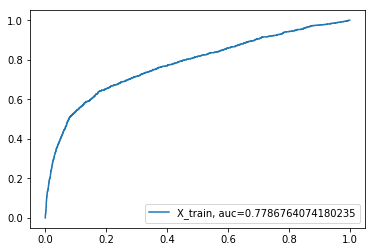

The model AUC is 0.78


In [10]:
# Let's see how much lift the model gives.  The area under the curve is 0.78.

from sklearn import metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="X_train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [12]:
# TUNE THE LOGISTIC REGRESSION MODEL

# Perform random combinations of parameters dual, max_iter, C

from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

grid = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')



Best: 0.896620 using {'dual': True, 'max_iter': 120}
Execution time: 34.69373893737793 ms


In [13]:
random = RandomizedSearchCV(estimator=logmodel, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.897349 using {'max_iter': 120, 'dual': True, 'C': 1.0}
Execution time: 7.708375930786133 ms


In [18]:
#  Run the logmodel again with the tuned paramenters:   'C': 1.0, 'dual': True, 'max_iter': 120

# HMMMM  didnt' change much.  Same accuracy and recall as with default parameters



from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# Show the confusion matrix of the models predictions and the true values of the test set.

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

# Use the .score functionality to calculate the accuracy of the model on the test set  
#  (TruePositive + TrueNegative)/Total
# Accuracy is the same as the majority class 89%, with precision at only 0.56 and recall only at 0.18

print('Accuracy of logistic regression classifier on validation set: {:.2f}'.format(logmodel.score(X_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[[8938 2031]
 [ 492  896]]
Accuracy of logistic regression classifier on validation set: 0.80
              precision    recall  f1-score   support

           0       0.95      0.81      0.88     10969
           1       0.31      0.65      0.42      1388

    accuracy                           0.80     12357
   macro avg       0.63      0.73      0.65     12357
weighted avg       0.88      0.80      0.82     12357



####  Tree Model

Much to my surprise, the DecisionTreeClassifier does not seem to take categorical values, as R does.  
https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree


The tree model below is based on
*  Numerical features only
*  Each numerical feature is standardized
*  Target variable is balanced using SMOTE to 50%/50%, up from original 89%/11%

Results were among the strongest:


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10969
           1       0.60      0.60      0.60      1388

    accuracy                           0.91     12357
    
    macro avg       0.78      0.77      0.77     12357
    weighted avg       0.91      0.91      0.91     12357
    
    

#### The model AUC is 0.92

See code below:



In [37]:
# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


# Make target variable numerical: from 'no' and 'yes', to 0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes

# Get all numerical variables and target variable 'y'

featuresNUM = ['age','duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']
data2 = bank[featuresNUM]
data2.head(3)

X = np.array(data2.ix[:, data2.columns != 'y'])
y = np.array(data2.ix[:, data2.columns == 'y'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

# Separate train from target, and create train data set (70% of the data) and the test data set (30% of the data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


Shape of X: (41188, 10)
Shape of y: (41188, 1)
Number transactions X_train dataset:  (28831, 10)
Number transactions y_train dataset:  (28831, 1)
Number transactions X_test dataset:  (12357, 10)
Number transactions y_test dataset:  (12357, 1)


C:\Python\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
C:\Python\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [38]:
# Standardize the *numerical values* so that large values do not dominate the model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)


# Show the resulting matrix

print(X_train.shape)
print(X_test.shape)

(28831, 10)
(12357, 10)


In [39]:
# Now apply SMOTE ONLY to the training data set.  !!!

sm = SMOTE(random_state=2, ratio = 1)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

#  The following shows that the classes are evenly split for the target:  y = 0 and y = 1
print('After OverSampling, the shape of train_X: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal==0)))


C:\Python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After OverSampling, the shape of train_X: (51158, 10)
After OverSampling, the shape of train_y: (51158,) 

After OverSampling, counts of label '1': 25579
After OverSampling, counts of label '0': 25579


In [40]:
# Create TreeModel based on Gini criterion and 3 layers max
TreeModel = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train the model on the training portion of the data and target
TreeModel = TreeModel.fit(X_train,y_train)

# Predict the target using the test dataset
Predictions = TreeModel.predict(X_test)

C:\Python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


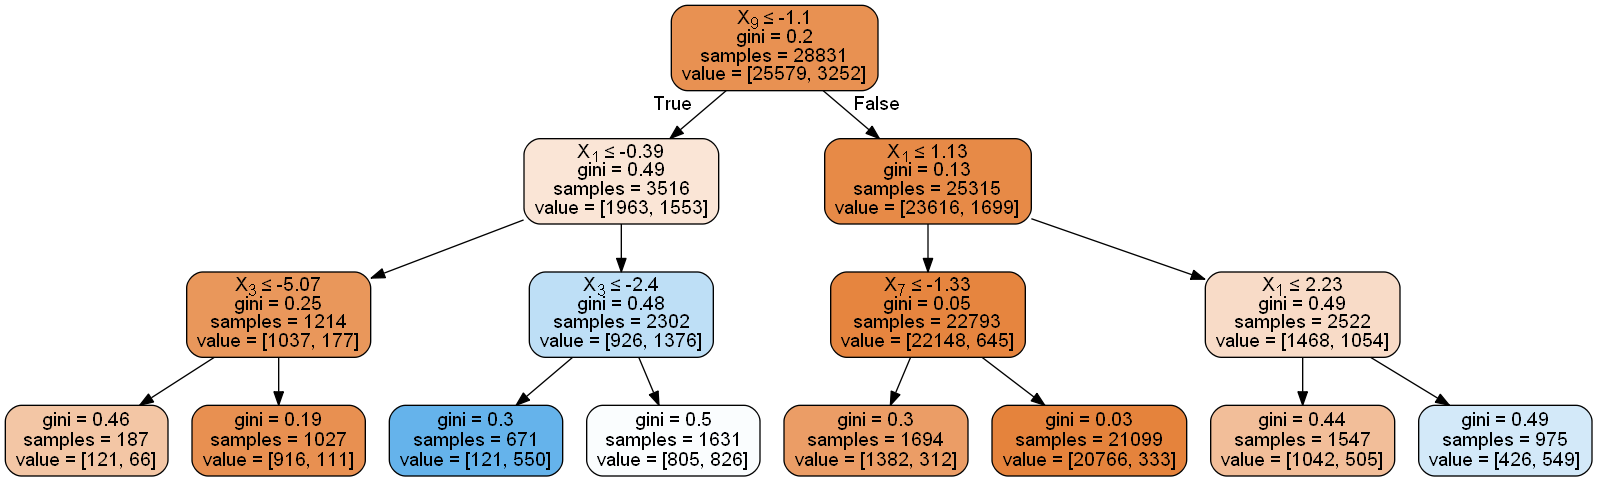

In [41]:
#   Display TreeModel based on Gini criterion and 3 layers max

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(TreeModel, out_file=dot_data,  
                filled=True, rounded=True, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [42]:
# Find accuracy of TreeModel3- based on numerical features.  Interestingly, it's 0.91 acuurate,

print("Accuracy of TreeModel is: {:.2f}".format(metrics.accuracy_score(y_test, Predictions)))  
 

Accuracy of TreeModel is: 0.91


In [43]:
# Calculate precision, recall, F1-score etc. of TreeModel
print(classification_report(y_test, Predictions))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10969
           1       0.60      0.60      0.60      1388

    accuracy                           0.91     12357
   macro avg       0.78      0.77      0.77     12357
weighted avg       0.91      0.91      0.91     12357



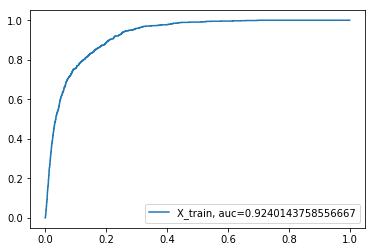

The model AUC is 0.92


In [44]:
# Let's see how much lift the model gives.  The area under the curve is 0.92.

from sklearn import metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="X_train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [23]:

bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                 float64
dtype: object

###  Exploratory Data Analysis




In [221]:
# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

In [222]:
# NOTE the target variable is unbalanced:  4,640 Yes and 36,548 No
# This needs to be addressed.

for(columnName, columnData) in bank.iteritems():
    print('Column Name: ', columnName)
    print()
    print('Column Value      Counts')
    print(columnData.value_counts().head(n = 5))
    print()
    print()

Column Name:  age

Column Value      Counts
31    1947
32    1846
33    1833
36    1780
35    1759
Name: age, dtype: int64


Column Name:  job

Column Value      Counts
admin.         10422
blue-collar     9254
technician      6743
services        3969
management      2924
Name: job, dtype: int64


Column Name:  marital

Column Value      Counts
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Column Name:  education

Column Value      Counts
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
Name: education, dtype: int64


Column Name:  default

Column Value      Counts
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Column Name:  housing

Column Value      Counts
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Column Name:  loan

Column Value      Counts
no         33950
yes

In [46]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int8
dtypes: float64(5), int64(5), int8(1), object(10)
mem

In [47]:
print(bank.shape)
bank=pd.DataFrame(bank) 
bank.head(5)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [48]:
# What % of each column are nulls....0 for all
bank.isna().mean().round(3)*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

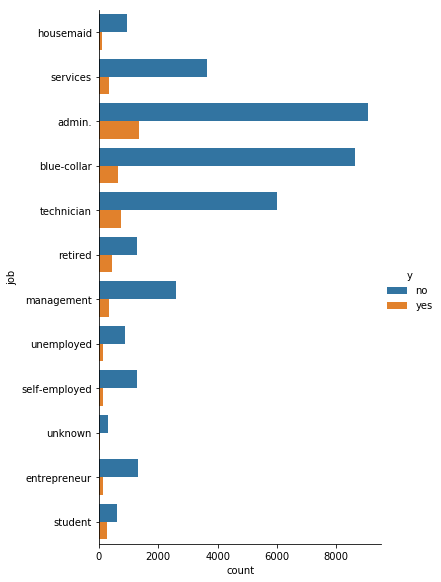

In [248]:
# This creates the bar chart!
# bank['job'].value_counts().plot.bar()

g = sns.catplot(y="job", hue="y", 
                data=bank, kind="count",
                height=8, aspect=.7);






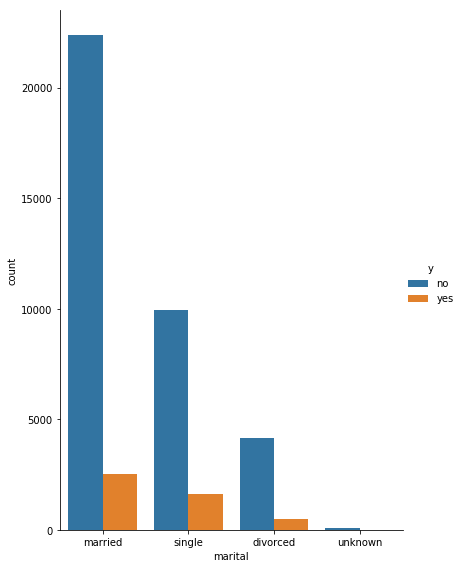

In [249]:
g = sns.catplot(x="marital", hue="y", 
                data=bank, kind="count",
                height=8, aspect=.7);

TypeError: 'AxesSubplot' object is not iterable

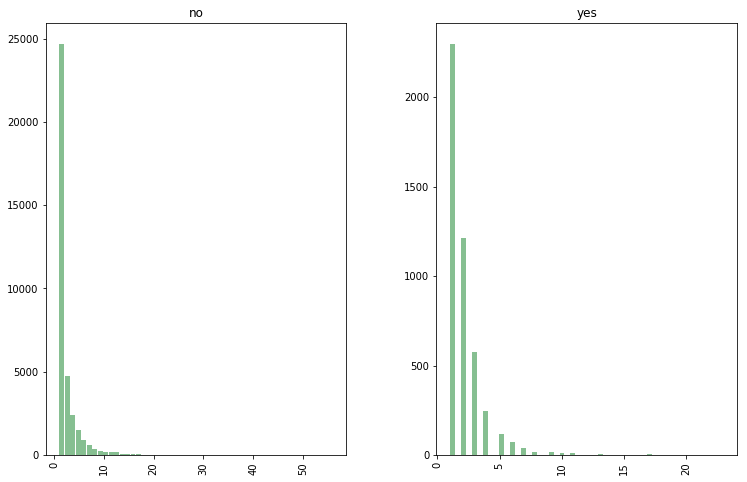

In [256]:
from matplotlib.ticker import StrMethodFormatter

# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

ax = bank.hist(column='campaign',by='y', bins = 50,  grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram of Consumer Price Index")

    # Set x-axis label
    x.set_xlabel("Campaign Numbert", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

TypeError: 'AxesSubplot' object is not iterable

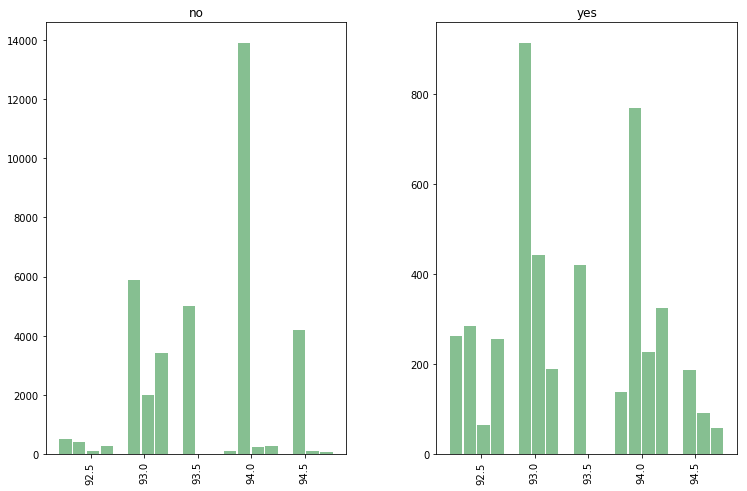

In [250]:
from matplotlib.ticker import StrMethodFormatter

# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

ax = bank.hist(column='cons.price.idx',by='y', bins = 20,  grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram of Campaign Number")

    # Set x-axis label
    x.set_xlabel("Campaign Numbert", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

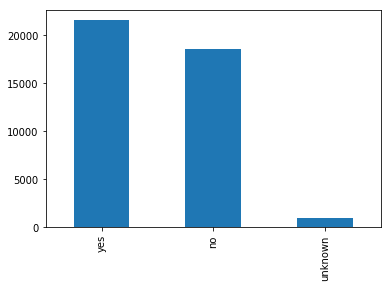

In [52]:
# How many of the respondees have a housing loan?   It turns out that more than half do.  
bank['housing'].value_counts().plot.bar()

TypeError: 'AxesSubplot' object is not iterable

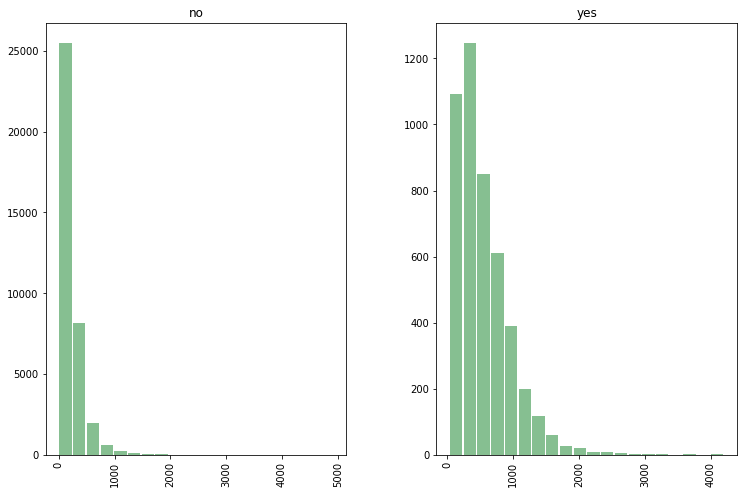

In [229]:
from matplotlib.ticker import StrMethodFormatter

ax = bank.hist(column='duration',by='y', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram of Duration of Conversation")

    # Set x-axis label
    x.set_xlabel("Duration of Conversation", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [208]:
bank['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

" Binned the duration of calls into 20 bins, then 150 to see the distribution.   \n\nHwoever the data dictionary said to discard this variable because it was not known in advance of the call.\n    \nNOTE---Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the \noutput target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. \nAlso, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes\nand should be discarded if the intention is to have a realistic predictive model."

(122.95, 125.409]     465
(95.901, 98.36]       457
(90.983, 93.442]      454
(110.655, 113.114]    446
(105.737, 108.196]    446
(78.688, 81.147]      433
(100.819, 103.278]    433
(132.786, 135.245]    432
(83.606, 86.065]      429
(73.77, 76.229]       427
(127.868, 130.327]    425
(137.704, 140.163]    419
(68.852, 71.311]      411
(154.917, 157.376]    409
(142.622, 145.081]    400
(115.573, 118.032]    391
(164.753, 167.212]    383
(149.999, 152.458]    377
(159.835, 162.294]    372
(63.934, 66.393]      370
(56.557, 59.016]      350
(169.671, 172.13]     338
(186.884, 189.343]    336
(71.311, 73.77]       328
(88.524, 90.983]      323
(174.589, 177.048]    322
(86.065, 88.524]      312
(196.72, 199.179]     309
(103.278, 105.737]    306
(181.966, 184.425]    304
(191.802, 194.261]    304
(81.147, 83.606]      303
(51.639, 54.098]      301
(108.196, 110.655]    300
(120.491, 122.95]     298
(206.556, 209.015]    298
(125.409, 127.868]    298
(113.114, 115.573]    291
(135.245, 13

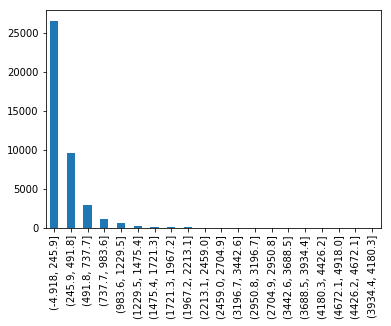

TypeError: 'AxesSubplot' object is not iterable

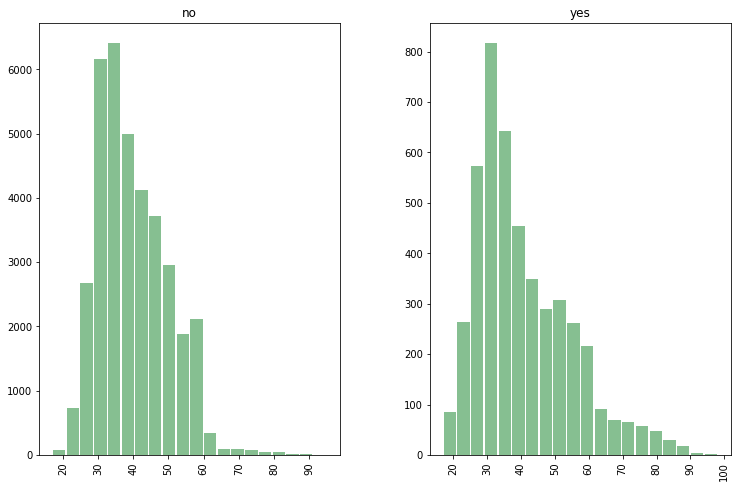

In [226]:
from matplotlib.ticker import StrMethodFormatter

ax = bank.hist(column='age',by='y', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Histogram of Age of Prospect")

    # Set x-axis label
    x.set_xlabel("Age of Prospect", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

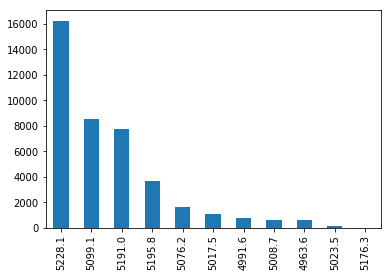

In [14]:
bank['nr.employed'].value_counts().plot.bar()

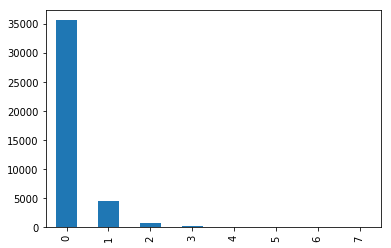

In [15]:
bank['previous'].value_counts().plot.bar()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
Name: pdays, dtype: int64

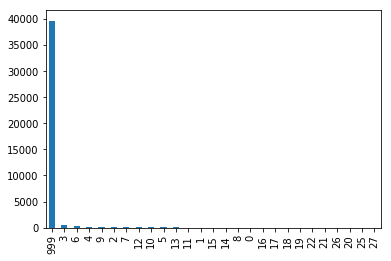

In [16]:
'''
'pdays' is  number of days that passed by after the client was last contacted from a previous campaign (numeric; 
999 means client was not previously contacted)
Almost 40,000 of  the 41,188 were to customers that had not been previously contacted.

IDEA   It might be worth separating out the 'never contacted' from the 'previously contacted' and compare results.
'''

bank['pdays'].value_counts().plot.bar()
bank['pdays'].value_counts().head(10)

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

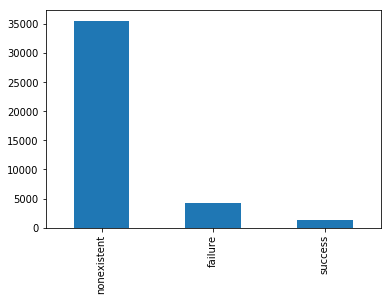

In [17]:


bank['poutcome'].value_counts().plot.bar()
bank['poutcome'].value_counts().head()

In [4]:
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [5]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
#######################     END OF ASSIGNMENT     ############################################

##### WHAT?  Python Trees only take Numerical Inputs?

Much to my surprise, the DecisionTreeClassifier does not seem to take categorical values, as R does.   I need to do OneHotEncoding or just use numerical inputs exclusively. So first lets start with numerical only inputs.

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

In [341]:
#  First let's keep only the numeric columns
#  Then let's drop
bank2 = bank.select_dtypes([np.number, ])
bank2.head(5) 




,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [342]:
#  Split data set into all the numerical features and the target variable

#split dataset in features and target variable
featuresNUM = ['age', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data2 = bank[featuresNUM]


# Make target variable numerical:  0 and 1 
bank['y'] = bank['y'].astype('category')
bank['y'] = bank['y'].cat.codes


target = bank.y
data2 = pd.DataFrame(data2)# Needed?
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [343]:
# Create train (70%) and test sets (30%)
data2_train, data2_test, target_train, target_test = train_test_split(data2,target, test_size = 0.3, random_state = 1)


In [344]:
# Create TreeModel3 based on numerical inputs, Gini criterion and 3 layers max.
TreeModel3 = DecisionTreeClassifier(criterion = "gini", max_depth = 4)

# Train the model on the training portion of the numerical data and target
TreeModel3 = TreeModel3.fit(data2_train,target_train)



# Predict the target using the test dataset
Predictions3 = TreeModel3.predict(data2_test)



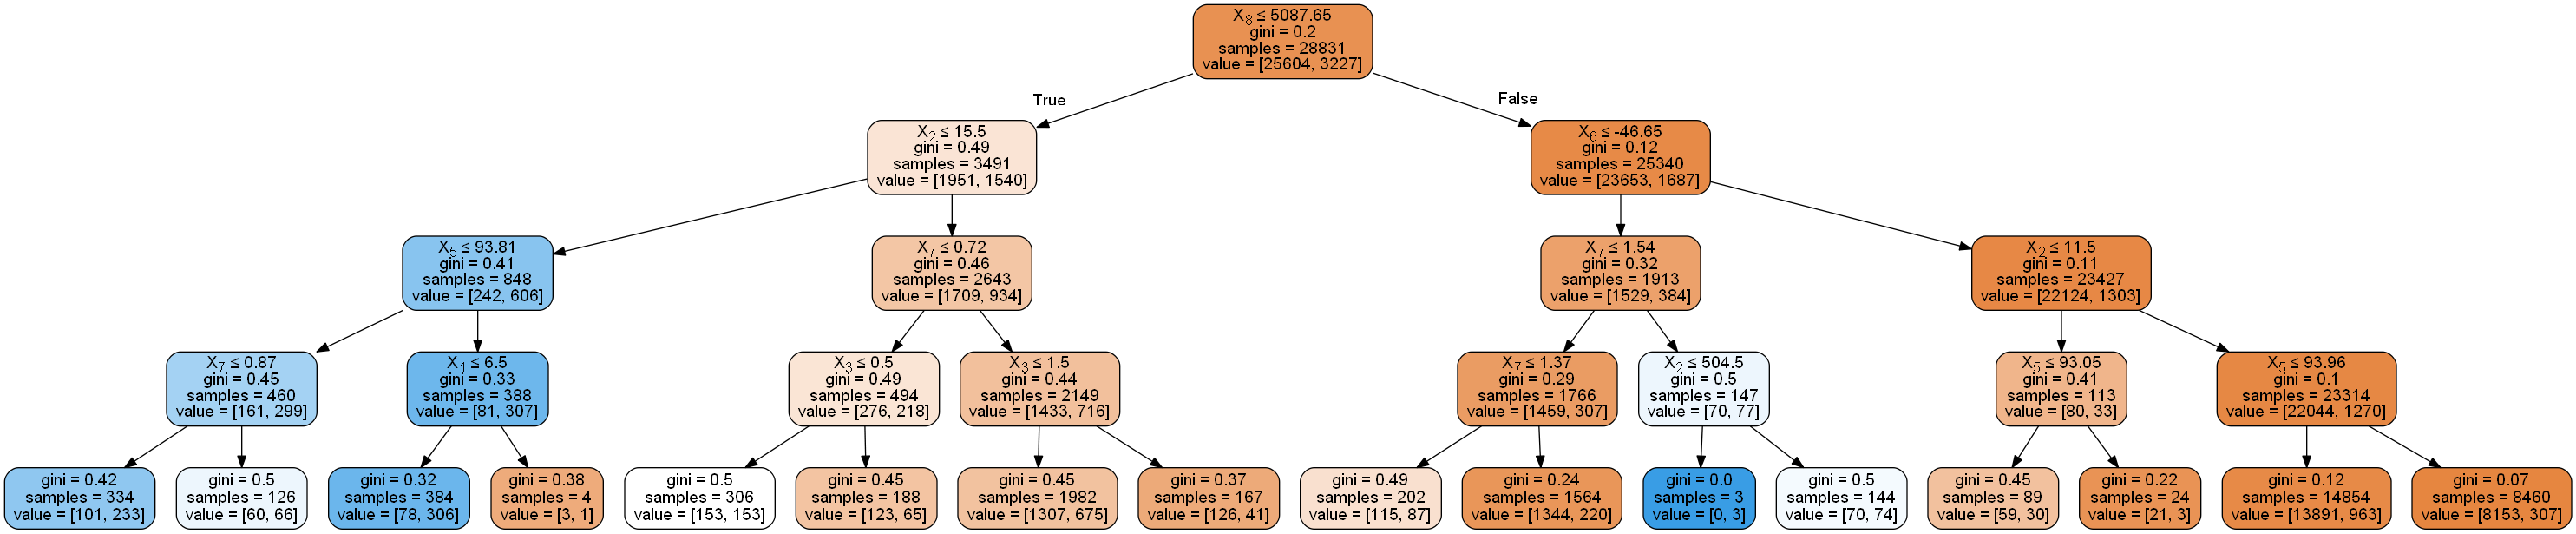

In [345]:
#   Display TreeModel3 based on Gini criterion and 3 layers max
#  NOTE    ****************   CHANGE DISPLAY TO INCLUDE FEATURE NAMES NOT X1 AND X9

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(TreeModel3, out_file=dot_data,  
                filled=True, rounded=True, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [346]:
# Find accuracy of TreeModel3- based on numerical features.  Interestingly, it's 0.91 acuurate,

print("Accuracy of TreeModel3 is: {:.2f}".format(metrics.accuracy_score(target_test, Predictions3)))  
      
 

Accuracy of TreeModel3 is: 0.90


In [347]:
# Calculate precision, recall, F1-score etc. of TreeModel.   Precision and Recall are very good (0.95) for the 0 case 
# (No subscription) to a term deposit).  
#  Precision and Recall are not very good(0.60) for the 1 case- Subscribe to a term deposit.  
print(classification_report(target_test, Predictions3))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10944
           1       0.64      0.19      0.29      1413

    accuracy                           0.90     12357
   macro avg       0.77      0.59      0.62     12357
weighted avg       0.87      0.90      0.87     12357



In [ ]:
# Let's see how much lift the model gives.  The area under the curve is 0.92.

from sklearn import metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="X_train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("The model AUC is {:.2f}".format(auc))

In [ ]:
#############    END OF ASSIGNMENT ######################

In [5]:
#  First let's keep only the numeric columns---hmmm no target column.....

# Load data 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')

bank2 = bank.select_dtypes([np.number, ])
bank2.head(5) 


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [8]:

#  Split data set into features I select and the target variable

#split dataset in features and target variable
features = ['age','marital', 'education', 'default', 'loan','housing' ]
data = bank[features]
target = bank.y

for(columnName, columnData) in bank.iteritems():
    print('Column Name: ', columnName)
    print()
    print('Column Value      Counts')
    print(columnData.value_counts())
    print()
    print()

data.tail()



Column Name:  age

Column Value      Counts
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


Column Name:  job

Column Value      Counts
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1

,age,marital,education,default,loan,housing
41183,73,married,professional.course,no,no,yes
41184,46,married,professional.course,no,no,no
41185,56,married,university.degree,no,no,yes
41186,44,married,professional.course,no,no,no
41187,74,married,professional.course,no,no,yes


In [101]:
# Create train (70%) and test sets (30%)
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.3, random_state = 1)
target.head(5)

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [102]:
# Create TreeModel based on Gini criterion and 3 layers max
TreeModel = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train the model on the training portion of the data and target
TreeModel = TreeModel.fit(data_train,target_train)

# Predict the target using the test dataset
Predictions = TreeModel.predict(data_test)

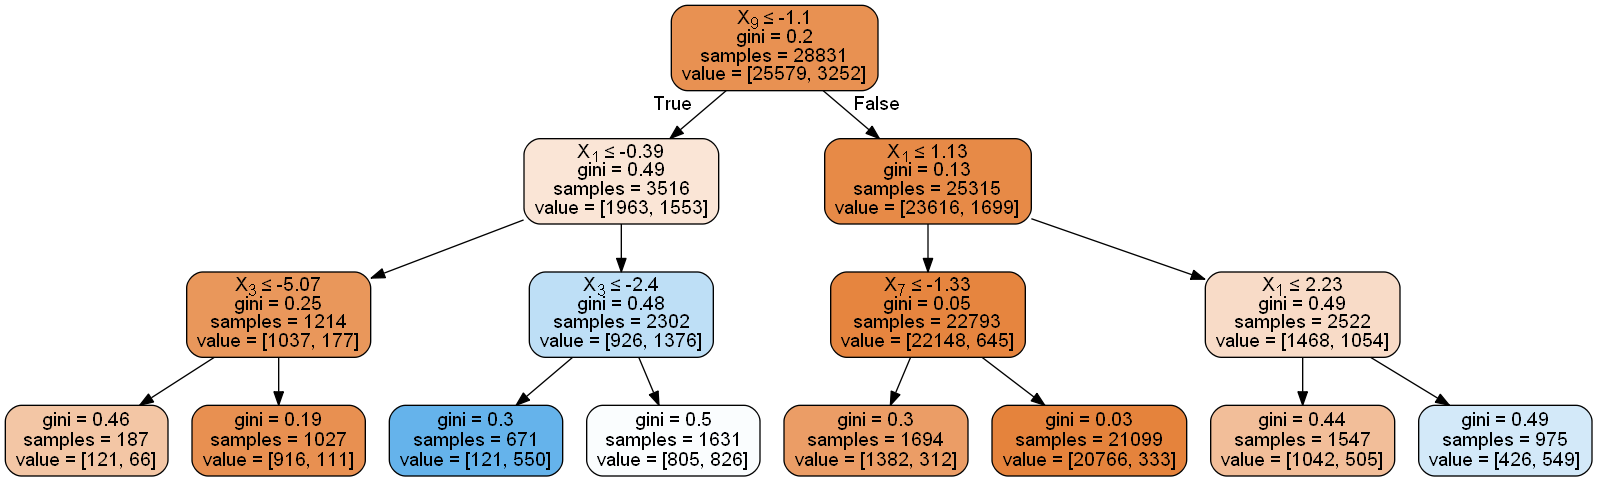

In [53]:
#   Display TreeModel based on Gini criterion and 3 layers max

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(TreeModel, out_file=dot_data,  
                filled=True, rounded=True, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [348]:
# Find accuracy of TreeModel

print("Accuracy of TreeModel is: {:.2f}".format(metrics.accuracy_score(target_test, Predictions)))  
      
 

NameError: name 'Predictions' is not defined

In [55]:
# Calculate precision, recall, F1-score etc. of TreeModel
print(classification_report(target_test, Predictions))



              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10944
         yes       0.39      0.00      0.01      1413

    accuracy                           0.89     12357
   macro avg       0.64      0.50      0.47     12357
weighted avg       0.83      0.89      0.83     12357



In [63]:
# Start the Decision Tree Classifier- Create based on Entropy criterion and 4 layers max
TreeModel2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train the model on the training portion of the data and target
TreeModel2 = TreeModel2.fit(data_train,target_train)

# Predict the target using the test dataset
Predictions2 = TreeModel2.predict(data_test)

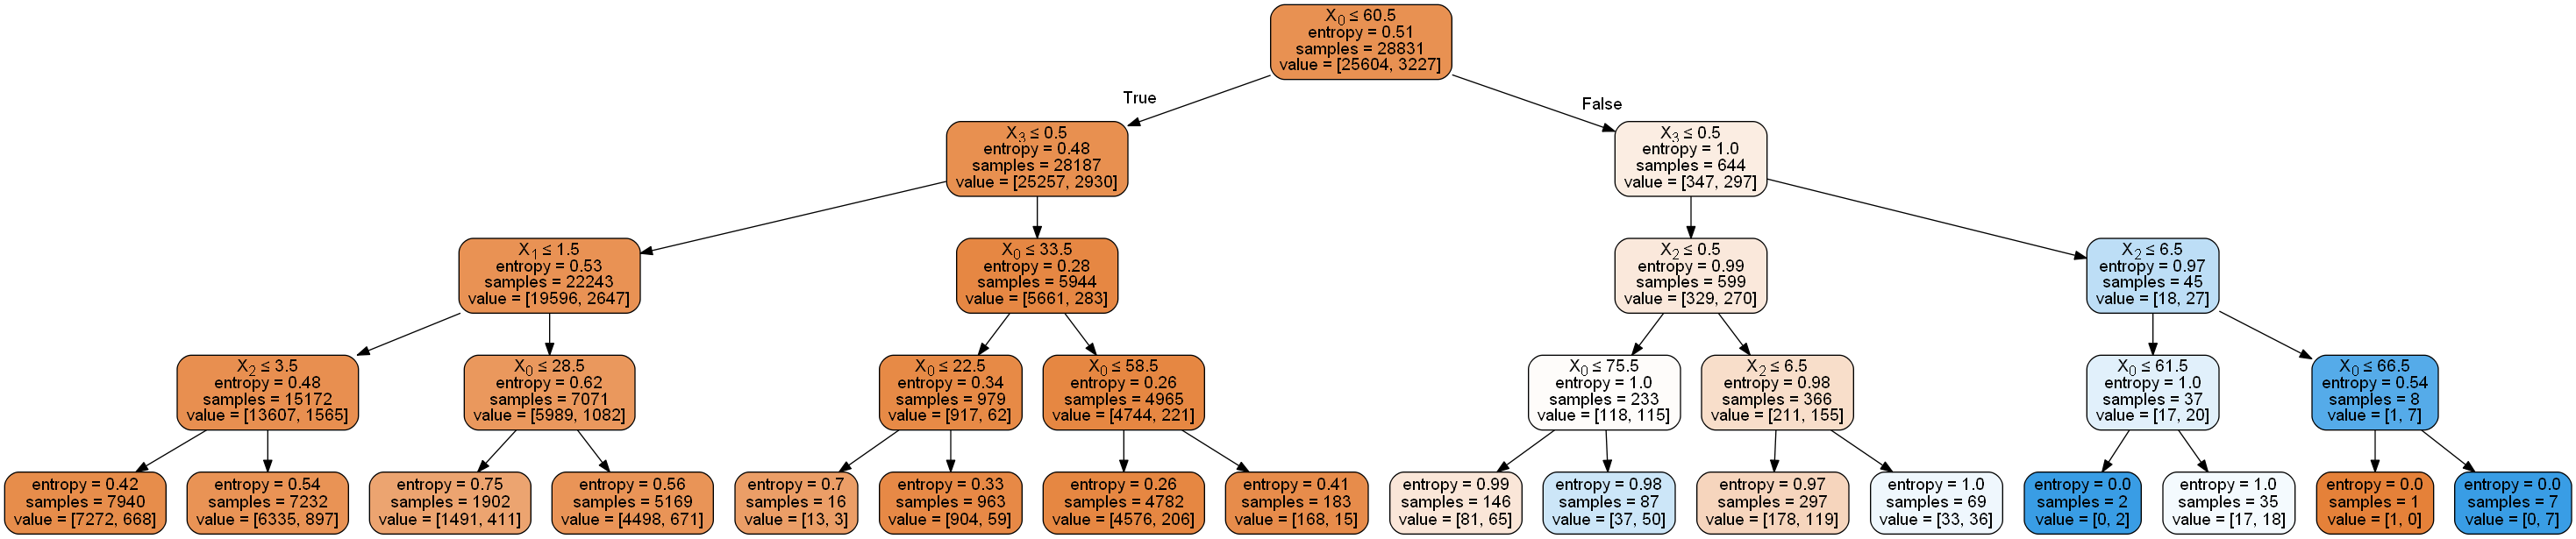

In [67]:
#   Display TreeModel2 based on Entropy criterion and 4 layers max


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(TreeModel2, out_file=dot_data,  
                filled=True, rounded=True, precision = 2,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph2.create_png())

In [59]:
# Find accuracy of TreeModel2.  Accuracy is not impproved by adding another layer or using Entropy.

print("Accuracy of TreeModel2 is: {:.2f}".format(metrics.accuracy_score(target_test, Predictions2)))  
      
 

Accuracy of TreeModel2 is: 0.89


In [65]:
# Calculate precision, recall, F1-score etc. of TreeModel2
print(classification_report(target_test, Predictions2))



              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10944
         yes       0.45      0.02      0.05      1413

    accuracy                           0.89     12357
   macro avg       0.67      0.51      0.49     12357
weighted avg       0.84      0.89      0.84     12357



In [ ]:
#  -----------------------------------------------------------------------------------------------------------

In [93]:
# Re- Load data and 
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


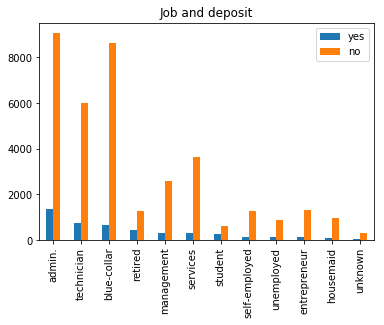

In [98]:
# Re- Load data
bank = pd.read_csv("bank-additional-full.csv", sep=';'  , engine='python')
bank.head(3)

#job and deposit
jobs = pd.DataFrame()

jobs['yes'] = bank[bank['y'] == 'yes']['job'].value_counts()
jobs['no'] = bank[bank['y'] == 'no']['job'].value_counts()

jobs.plot.bar(title = 'Job and deposit')

AttributeError: 'DataFrame' object has no attribute 'marital'

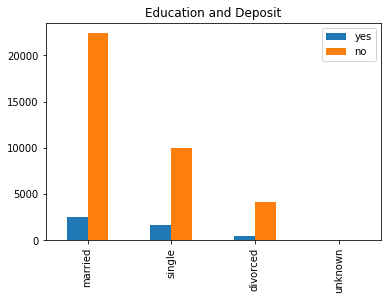

In [112]:
#Marital status and deposit
marital = pd.DataFrame()

marital['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
marital['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

marital.plot.bar(title = 'Education and Deposit')





# set the values for the x-axis that we want to plot,
# in this case the time values in years
bank.set_index(['marital'], inplace=True)

# iterate through the list of countries, and create a plot
for marital in bank.marital.unique():
    # .plot.bar makes bar charts
    ax = bank[marital.Marital==marital].plot.bar(stacked=True)
    # make room for the legend, and sets in the upper right corner
    ax.set_xlim(ax.get_xlim()[0],ax.get_xlim()[1]+1)
    ax.legend(loc='upper right')
    # add the country name to the top of the chart.
    ax.set_title(Marital)

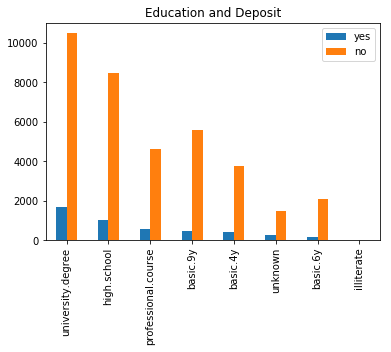

In [108]:
# Education and deposit
education = pd.DataFrame()

education['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
education['no'] = bank[bank['y'] == 'no']['education'].value_counts()

education.plot.bar(title = 'Education and Deposit')

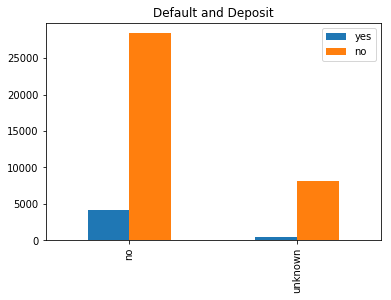

In [107]:
# Default and Deposit
default = pd.DataFrame()

default['yes'] = bank[bank['y'] == 'yes']['default'].value_counts()
default['no'] = bank[bank['y'] == 'no']['default'].value_counts()

default.plot.bar(title = 'Default and Deposit')

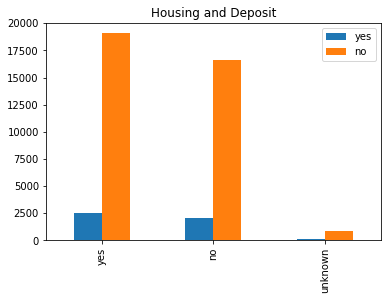

In [106]:
## Housing and Deposit
housing = pd.DataFrame()

housing['yes'] = bank[bank['y'] == 'yes']['housing'].value_counts()
housing['no'] = bank[bank['y'] == 'no']['housing'].value_counts()

housing.plot.bar(title = 'Housing and Deposit')

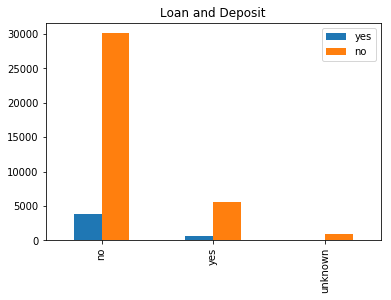

In [105]:
# Loan and Deposit
loan = pd.DataFrame()

loan['yes'] = bank[bank['y'] == 'yes']['loan'].value_counts()
loan['no'] = bank[bank['y'] == 'no']['loan'].value_counts()

loan.plot.bar(title = 'Loan and Deposit')

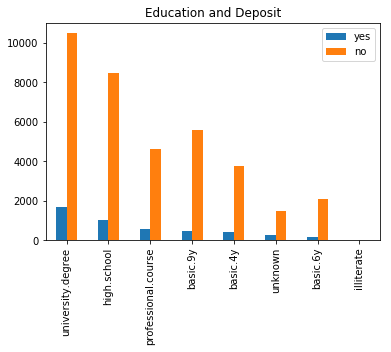

In [113]:
# Education and deposit
education = pd.DataFrame()

education['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
education['no'] = bank[bank['y'] == 'no']['education'].value_counts()

education.plot.bar(title = 'Education and Deposit')

### References

Addressing the unbalanced class of the target variable.
https://www.researchgate.net/publication/328019137_Effective_Classification_for_Unbalanced_Bank_Direct_Marketing_Data_with_Over-sampling

#### Objective of Analysis

Banks make money by having deposits that are committed for a certain period of time and lending them out for higher interest than they pay to the depositer.  If I buy a 2-year, USD 10,000 CD (Certificate of Deposit), I commit that I will not with withdraw that USD 10,000 for 2 years.   The bank can then lend that money for a 2 year loan without worry that it will disappear.  In return for that commitment, the bank gives me a slightly higher interest rate.


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a CD (variable y).

#### Data Dictionary

##### Input variables: # bank client data:  features of the bank direct marketing data set.

1 - age The age of the client.       Numeric

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
* Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

##### other attributes:

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


Acknowledgements:  
We thank UCI Machine learning repository for providing this dataset.



In [ ]:
'''
For ideas:
https://www.kaggle.com/yufengsui/machine-learning-project-bank-marketing-analytics/data

https://www.kaggle.com/yufengsui/machine-learning-project-bank-marketing-analytics   REALLY GOOD ONE

Great Text book in my folder
file:///C:/Users/lucin.000/Documents/EAI%206000/Python%20Machine%20Learning.pdf


How a bank makes Money with a term deposit:
https://www.investopedia.com/terms/t/termdeposit.asp#targetText=Banks%20are%20businesses%2C%20as%20such,rate%20to%20borrowers%20for%20loans.&targetText=However%2C%20there%20is%20a%20balance,into%20the%20term%20deposit%20accounts.

'''